In [ ]:
# Starter cell\nprint('Notebook created successfully ✅')

In [3]:
# 1. Setup & imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

print("Environment ready ✅")


Environment ready ✅


In [4]:
# 2. Load the Shark Attacks dataset

file_path = "../data/shark_attacks.csv"   # points to the data folder
df = pd.read_csv(file_path, encoding="latin-1")

# Show first 5 rows
df.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
# 3. Quick inspection of dataset
df.info()
df.isna().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
Date                      19421
Case Number.1             19421
pdf                       19421
dtype: int64

In [6]:
# Cell 4 — Drop duplicate rows and show counts before/after
print("Shape before dedup:", df.shape)

# Count duplicated rows
num_dup = df.duplicated().sum()
print("Number of exact duplicate rows:", num_dup)

# Drop duplicates (in-place)
df = df.drop_duplicates().reset_index(drop=True)

print("Shape after dedup: ", df.shape)
# Show first few rows to confirm
df.head()


Shape before dedup: (25723, 24)
Number of exact duplicate rows: 19411
Shape after dedup:  (6312, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
# Cell 5 — Standardize column names
# Save original columns for reference
original_cols = df.columns.tolist()
print("Original columns:", original_cols)

# Standardize: strip, lower, replace spaces with underscores, remove weird chars
df.columns = (
    df.columns
      .astype(str)
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace(r"[^\w_]", "", regex=True)
)

print("Standardized columns:", df.columns.tolist())

# Optional: preview a few columns and types
df.iloc[:, :10].head()  # show first 10 columns (or change slice)


Original columns: ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
Standardized columns: ['case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex', 'age', 'injury', 'fatal_yn', 'time', 'species', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number1', 'case_number2', 'original_order', 'unnamed_22', 'unnamed_23']


,case_number,date,year,type,country,area,location,activity,name,sex
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M


In [8]:
# Cell 6 — Clean age column
age_col_candidates = [c for c in df.columns if "age" in c]
print("Age column candidates found:", age_col_candidates)

if len(age_col_candidates) == 0:
    print("No column with 'age' in its name found. Please check column names.")
else:
    # choose the first candidate as age column
    age_col = age_col_candidates[0]
    print("Using age column:", age_col)

    # 1) Inspect a sample of unique values to understand formats
    sample_vals = df[age_col].dropna().astype(str).sample(min(20, df.shape[0]), random_state=1).unique()
    print("Sample age values (raw):", sample_vals)

    # 2) Extract first number found in the string (handles "23", "23 yrs", "about 23", "23-24", etc.)
    df[age_col + "_clean"] = (
        df[age_col].astype(str)
                    .str.extract(r"(\d{1,3})")  # capture 1-3 digit numbers
                    .astype(float)
    )

    # 3) If extraction produced NaN for many rows, you can try alternative approaches
    missing_before = df[age_col].isna().sum()
    missing_after = df[age_col + "_clean"].isna().sum()
    print(f"Missing in original '{age_col}':", missing_before)
    print(f"Missing in cleaned '{age_col}_clean':", missing_after)

    # 4) Quick sanity checks and value distribution
    print("Age summary (clean):")
    display(df[age_col + "_clean"].describe())

    # 5) Preview original vs cleaned for first 10 non-null rows
    preview = df[[age_col, age_col + "_clean"]].dropna().head(10)
    display(preview)


Age column candidates found: ['age']
Using age column: age
Sample age values (raw): ['27' '38' '\xa0 ' '26' '25' '40' '43' '28' '22' '14' '46' '20' '58'
 '36 & 26' '17' '20?' '15' '54']
Missing in original 'age': 2841
Missing in cleaned 'age_clean': 2871
Age summary (clean):


count    3441.000000
mean       27.315606
std        13.898064
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: age_clean, dtype: float64

,age,age_clean
0,57,57.0
1,11,11.0
2,48,48.0
6,18,18.0
7,52,52.0
8,15,15.0
9,12,12.0
10,32,32.0
11,10,10.0
12,10,10.0


In [9]:
# Cell 8 — Standardize sex/gender column

sex_candidates = [c for c in df.columns if c in ['sex', 'gender'] or 'sex' in c or 'gender' in c]
print("Sex column candidates:", sex_candidates)

if not sex_candidates:
    print("No sex/gender column found. Skip this step.")
else:
    sex_col = sex_candidates[0]
    print("Using sex column:", sex_col)
    
    # Normalize strings
    df[sex_col] = df[sex_col].astype(str).str.strip().str.lower()
    
    # Map common variants to 'Male', 'Female', keep others as 'unknown'
    mapping = {
        'm': 'Male', 'male': 'Male', 'man': 'Male',
        'f': 'Female', 'female': 'Female', 'woman': 'Female',
        'unknown': 'unknown', 'nan': None, 'none': None
    }
    df['sex_clean'] = df[sex_col].map(mapping).fillna(
                        df[sex_col].apply(lambda x: 'Male' if x.lower().startswith('m') else
                                                  'Female' if x.lower().startswith('f') else
                                                  'unknown')
                      )
    
    # Final tidy (replace possible 'none'/'nan')
    df['sex_clean'] = df['sex_clean'].replace({'None': None, 'nan': None})
    
    # Preview counts
    display(df[sex_col].value_counts(dropna=False).head(10))
    print("Cleaned sex value counts:")
    display(df['sex_clean'].value_counts(dropna=False))


Sex column candidates: ['sex']
Using sex column: sex


sex
m      5096
f       637
nan     575
n         2
lli       1
.         1
Name: count, dtype: int64

Cleaned sex value counts:


sex_clean
Male       5096
Female      637
unknown     579
Name: count, dtype: int64

In [10]:
# Cell 9 — Group activities into buckets (surfing, swimming, diving, fishing, boating, other)

# Find activity column
activity_candidates = [c for c in df.columns if 'activity' in c or 'activity' in c.lower()]
activity_candidates = activity_candidates or [c for c in df.columns if 'act' in c.lower()]
print("Activity candidates:", activity_candidates)

if not activity_candidates:
    print("No activity column found; check column names.")
else:
    act_col = activity_candidates[0]
    print("Using activity column:", act_col)
    
    # Normalize text
    df[act_col] = df[act_col].astype(str).str.lower().str.strip()
    
    # Define mapping function using keywords
    def map_activity_text(text):
        if pd.isna(text) or text in ['nan', 'none', '']:
            return 'unknown'
        t = text.lower()
        if any(k in t for k in ['surf', 'surfer']):
            return 'surfing'
        if any(k in t for k in ['swim', 'snorkel', 'wade', 'swimmer']):
            return 'swimming'
        if any(k in t for k in ['div', 'scuba', 'snork', 'freediv', 'free dive']):
            return 'diving'
        if any(k in t for k in ['fish', 'fishing', 'angling']):
            return 'fishing'
        if any(k in t for k in ['boat', 'kayak', 'ship', 'vessel', 'sea plane', 'sail']):
            return 'boating'
        if any(k in t for k in ['stand up paddle', 'paddle', 'paddleboard']):
            return 'paddleboard'
        # Add more heuristics as needed
        return 'other'
    
    df['activity_group'] = df[act_col].apply(map_activity_text)
    display(df[[act_col, 'activity_group']].dropna().head(20))
    print("Activity group counts:")
    display(df['activity_group'].value_counts())


Activity candidates: ['activity']
Using activity column: activity


,activity,activity_group
0,paddling,other
1,standing,other
2,surfing,surfing
3,surfing,surfing
4,free diving,diving
5,kite surfing,surfing
6,swimming,swimming
7,fishing,fishing
8,walking,other
9,standing,other


Activity group counts:


activity_group
other          1339
surfing        1261
swimming       1210
fishing        1107
diving          589
unknown         556
boating         227
paddleboard      23
Name: count, dtype: int64

In [11]:
# Cell 10 — Derive fatal flag and some useful indicators

# Find candidate fatal column names
fatal_candidates = [c for c in df.columns if 'fatal' in c or 'death' in c or 'fatal_(y' in c]
print("Fatal candidates:", fatal_candidates)

if not fatal_candidates:
    print("No explicit fatal column found. Attempting to infer from likely columns.")
    # try to infer from a common column name 'fatal_(y/n)'
    if 'fatal_(y_n)' in df.columns:
        fc = 'fatal_(y_n)'
    elif 'fatal_(y/n)' in df.columns:
        fc = 'fatal_(y/n)'
    else:
        fc = None
else:
    fc = fatal_candidates[0]
    print("Using fatal column:", fc)

if fc:
    df[fc] = df[fc].astype(str).str.strip().str.upper()
    df['fatal_flag'] = df[fc].map(lambda x: 1 if x.startswith('Y') else (0 if x.startswith('N') else None))
else:
    # If no column, create based on 'outcome' or similar heuristics
    df['fatal_flag'] = None

# Create a simple 'is_young' feature (age < 30) if age_clean exists
age_col_clean = [c for c in df.columns if c.endswith('_clean') and 'age' in c]
if age_col_clean:
    ac = age_col_clean[0]
    df['is_young'] = df[ac].apply(lambda x: 1 if pd.notnull(x) and x < 30 else 0 if pd.notnull(x) else None)
    print("Using age clean column:", ac)
else:
    print("No cleaned age column found; skip young flag.")

# Quick check
display(df[['fatal_flag']].value_counts(dropna=False))


Fatal candidates: ['fatal_yn']
Using fatal column: fatal_yn
Using age clean column: age_clean


fatal_flag
0.0           4850
1.0           1389
NaN             73
Name: count, dtype: int64

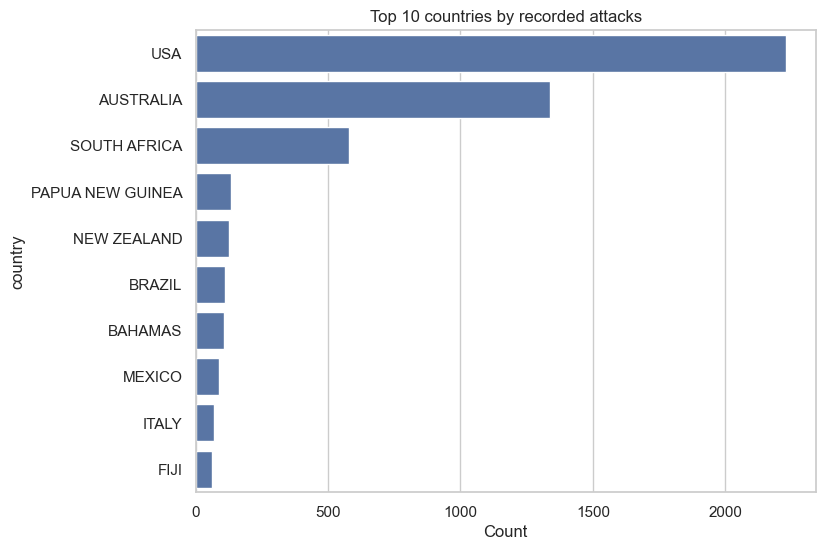

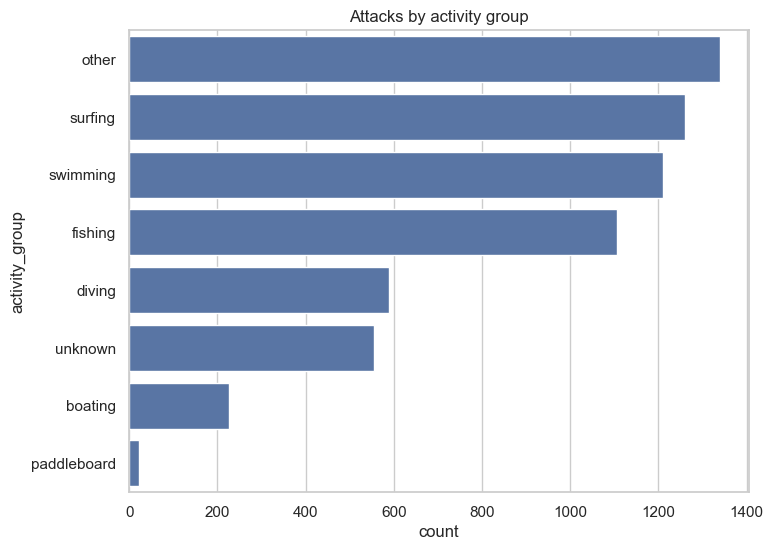

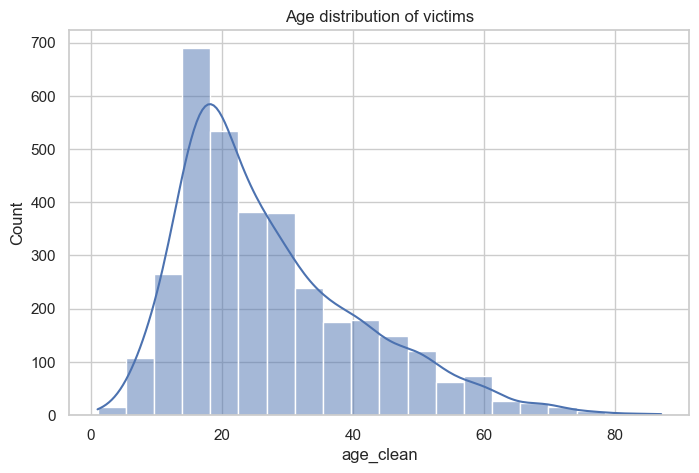

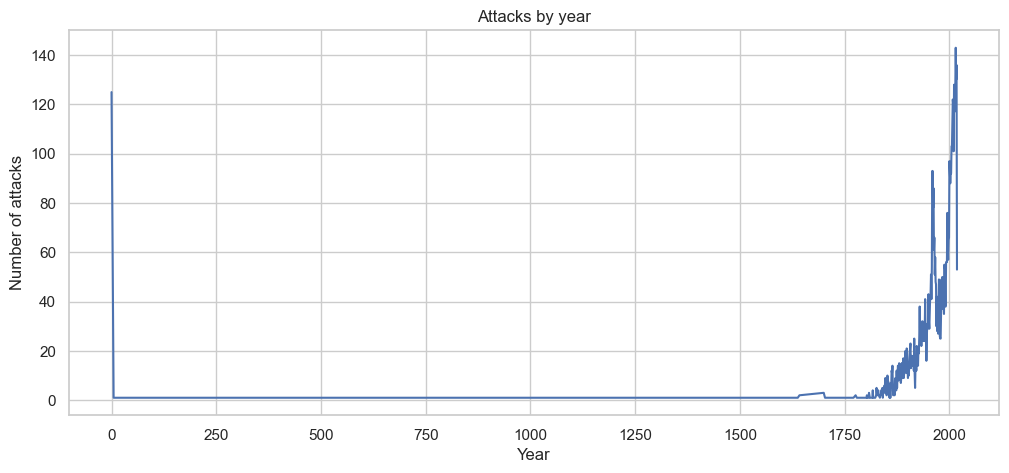

In [12]:
# Cell 11 — Basic EDA visualizations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Top countries (defensive column name)
country_col = [c for c in df.columns if 'country' in c]
country_col = country_col[0] if country_col else None

if country_col:
    top_countries = df[country_col].value_counts().nlargest(10)
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top 10 countries by recorded attacks")
    plt.xlabel("Count")
    plt.show()
else:
    print("Country column not found.")

# Activity groups
if 'activity_group' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(y='activity_group', data=df, order=df['activity_group'].value_counts().index)
    plt.title("Attacks by activity group")
    plt.show()
else:
    print("No activity_group column to plot.")

# Age distribution
age_col = age_col_clean[0] if age_col_clean else None
if age_col:
    plt.figure(figsize=(8,5))
    sns.histplot(df[age_col].dropna(), bins=20, kde=True)
    plt.title("Age distribution of victims")
    plt.show()
else:
    print("No cleaned age column for histogram.")

# Attacks over time (year)
if 'year' in df.columns:
    attacks_by_year = df['year'].value_counts().sort_index()
    plt.figure(figsize=(12,5))
    attacks_by_year.plot()
    plt.title("Attacks by year")
    plt.ylabel("Number of attacks")
    plt.xlabel("Year")
    plt.show()
else:
    print("No year column to plot.")


In [13]:
# Cell 12 — Save the cleaned dataset (versioned)
output_path = "../data/shark_attacks_cleaned_v2.csv"
df.to_csv(output_path, index=False)
print("Saved cleaned dataset to:", output_path)


Saved cleaned dataset to: ../data/shark_attacks_cleaned_v2.csv
